# Exploratory Data Analysis (EDA)

## Library Package Loading

In [674]:
import pandas as pd
import numpy as np

import seaborn as sns
color = sns.color_palette()
sns.set_style('white')

import matplotlib.pyplot as plt
# sets the backend of matplotlib to the 'inline' backend
%matplotlib inline


from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

#removes the mean and scales each feature/variable to unit variance
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

from sklearn.preprocessing import LabelEncoder

from tqdm import tqdm

from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK

In [675]:
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from scipy.stats import norm, skew #for some statistics

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

from subprocess import check_output

In [676]:
from datetime import datetime
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import os
import pickle

In [677]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Data Loading

In [678]:
#bring in the six packs
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [679]:
#check the decoration
df_train.columns
df_train['SalePrice'].describe()
df_test.columns

##display the first five rows of the train dataset.
df_train.head(5)
##display the first five rows of the test dataset.
df_test.head(5)

print('START data processing', datetime.now(), )
print("Train set size:", df_train.shape)
print("Test set size:", df_test.shape)

START data processing 2021-10-15 13:10:37.785800
Train set size: (1460, 81)
Test set size: (1459, 80)


In [680]:
# Check for duplicates
idsUnique = len(set(df_train.Id))
idsTotal = df_train.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 0 duplicate IDs for 1460 total entries


In [681]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(df_train.shape))
print("The test data size before dropping Id feature is : {} ".format(df_test.shape))


#Save the 'Id' column

#Save the 'Id' column
train_ID = df_train['Id']
test_ID = df_test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
df_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(df_train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(df_test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


## Descriptive Data

## Univariate analysis - Analyzing 'SalePrice'

In [682]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count     1460.000
mean    180921.196
std      79442.503
min      34900.000
25%     129975.000
50%     163000.000
75%     214000.000
max     755000.000
Name: SalePrice, dtype: float64

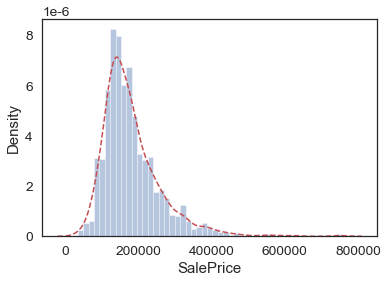

In [683]:
#histogram
sns.set_style('white')
sns.distplot(df_train['SalePrice'], kde_kws={"color": "r", "lw": 1.5, 'linestyle':'--'});

Deviate from the normal distribution.

Have appreciable positive skewness.

Show peakedness.

In [684]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


## Relationship with numerical variables (Bivariate analysis)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

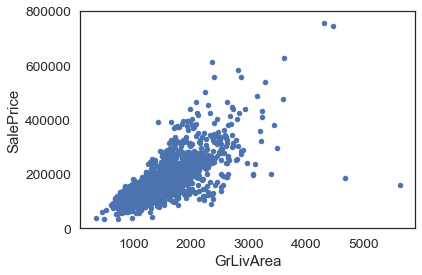

In [685]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

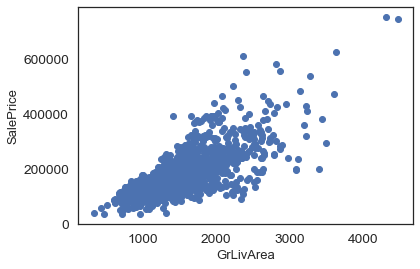

In [686]:
#Deleting outliers
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)
#Check the graphic again
#df_train.reset_index(drop=True, inplace=True)
# train = train[train.GrLivArea < 4000]
#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
#plt.axvline(x=4000,color='purple')
#plt.axhline(y=300000,color='purple')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


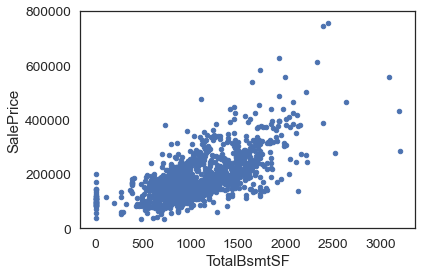

In [687]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));
#plt.axvline(x=3000,color='purple')
#plt.axhline(y=350000,color='purple')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


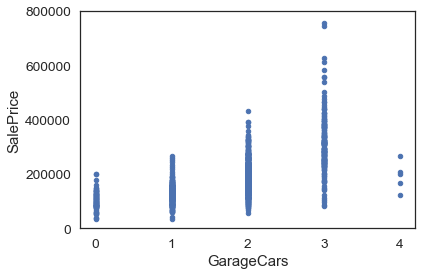

In [688]:
#scatter plot GarageCars/saleprice
var = 'GarageCars'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


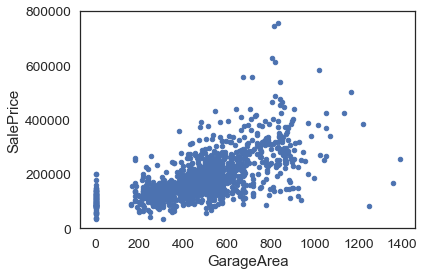

In [689]:
#scatter plot GarageArea/saleprice
var = 'GarageArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

## Relationship with categorical features

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

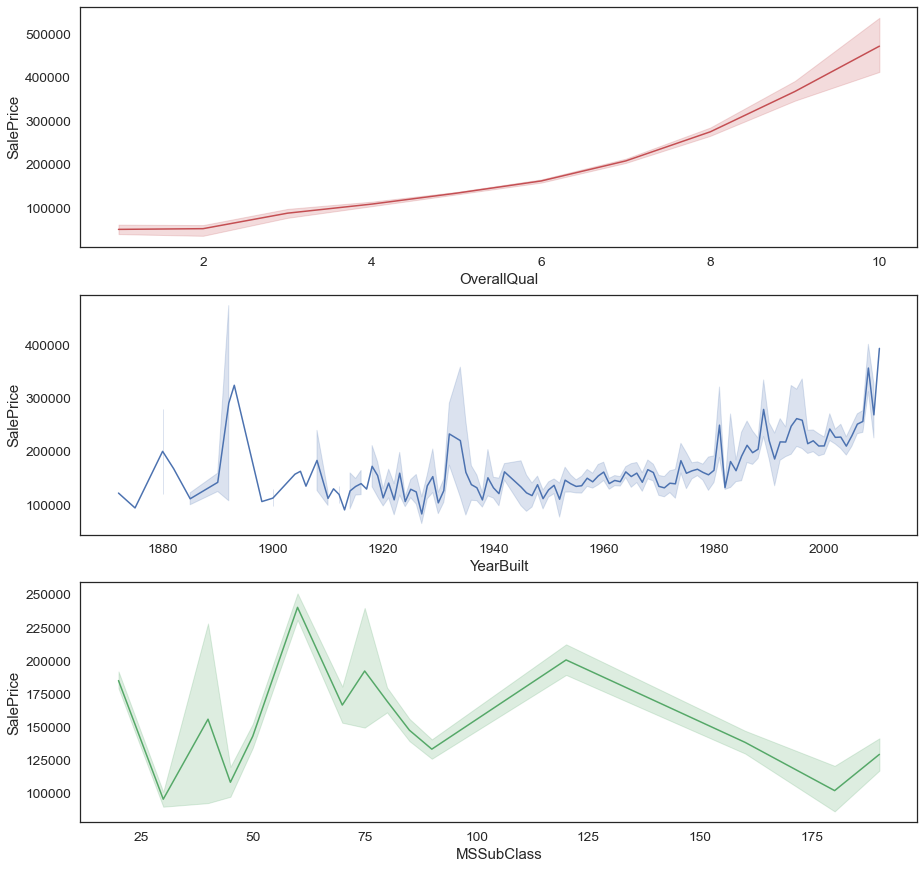

In [690]:
import seaborn as sn
fig,ax = plt.subplots(3,1,figsize=(15,15))
sn.lineplot(x=df_train['OverallQual'],y=df_train.SalePrice,ax=ax[0],color='r') #We visualize 3 features with different levels of correlation with SalePrice
sn.lineplot(x=df_train['YearBuilt'],y=df_train.SalePrice,ax=ax[1],color='b')
sn.lineplot(x=df_train['MSSubClass'],y=df_train.SalePrice,ax=ax[2],color='g')

In [691]:
numerical_data = df_train.select_dtypes("number")
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1458 non-null   int64  
 1   LotFrontage    1199 non-null   float64
 2   LotArea        1458 non-null   int64  
 3   OverallQual    1458 non-null   int64  
 4   OverallCond    1458 non-null   int64  
 5   YearBuilt      1458 non-null   int64  
 6   YearRemodAdd   1458 non-null   int64  
 7   MasVnrArea     1450 non-null   float64
 8   BsmtFinSF1     1458 non-null   int64  
 9   BsmtFinSF2     1458 non-null   int64  
 10  BsmtUnfSF      1458 non-null   int64  
 11  TotalBsmtSF    1458 non-null   int64  
 12  1stFlrSF       1458 non-null   int64  
 13  2ndFlrSF       1458 non-null   int64  
 14  LowQualFinSF   1458 non-null   int64  
 15  GrLivArea      1458 non-null   int64  
 16  BsmtFullBath   1458 non-null   int64  
 17  BsmtHalfBath   1458 non-null   int64  
 18  FullBath

## Correlation matrix (heatmap style)

<AxesSubplot:>

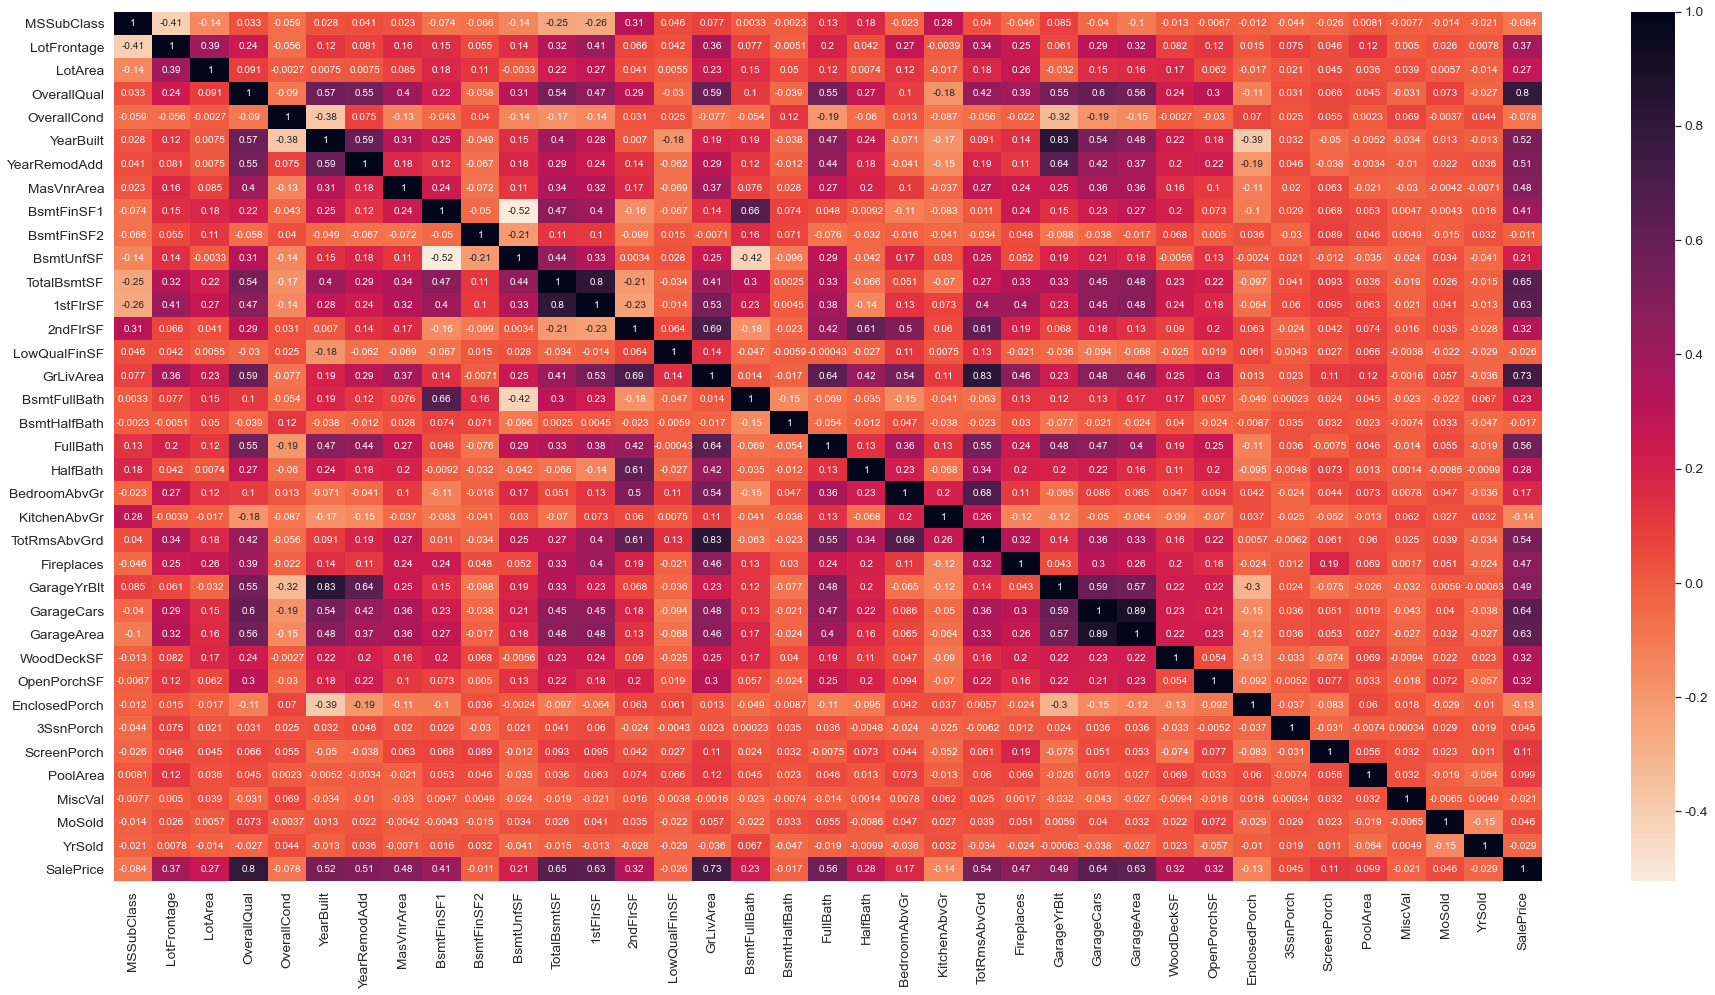

In [692]:
plt.figure(figsize=(32,16))
sn.heatmap(df_train.corr(),cmap='rocket_r',annot=True) #Big correlation between YearBuilt and GarageYrBuilt -> delete GarageYrBuilt (difficult to impute null values)

## SalePrice correlation matrix (zoomed heatmap style)

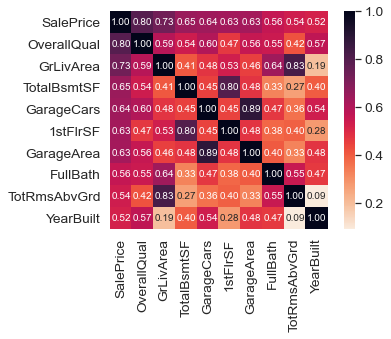

In [694]:
#correlation matrix
corrmat = df_train.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cmap='rocket_r', cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Scatter plots between 'SalePrice' and correlated variables (move like Jagger style)

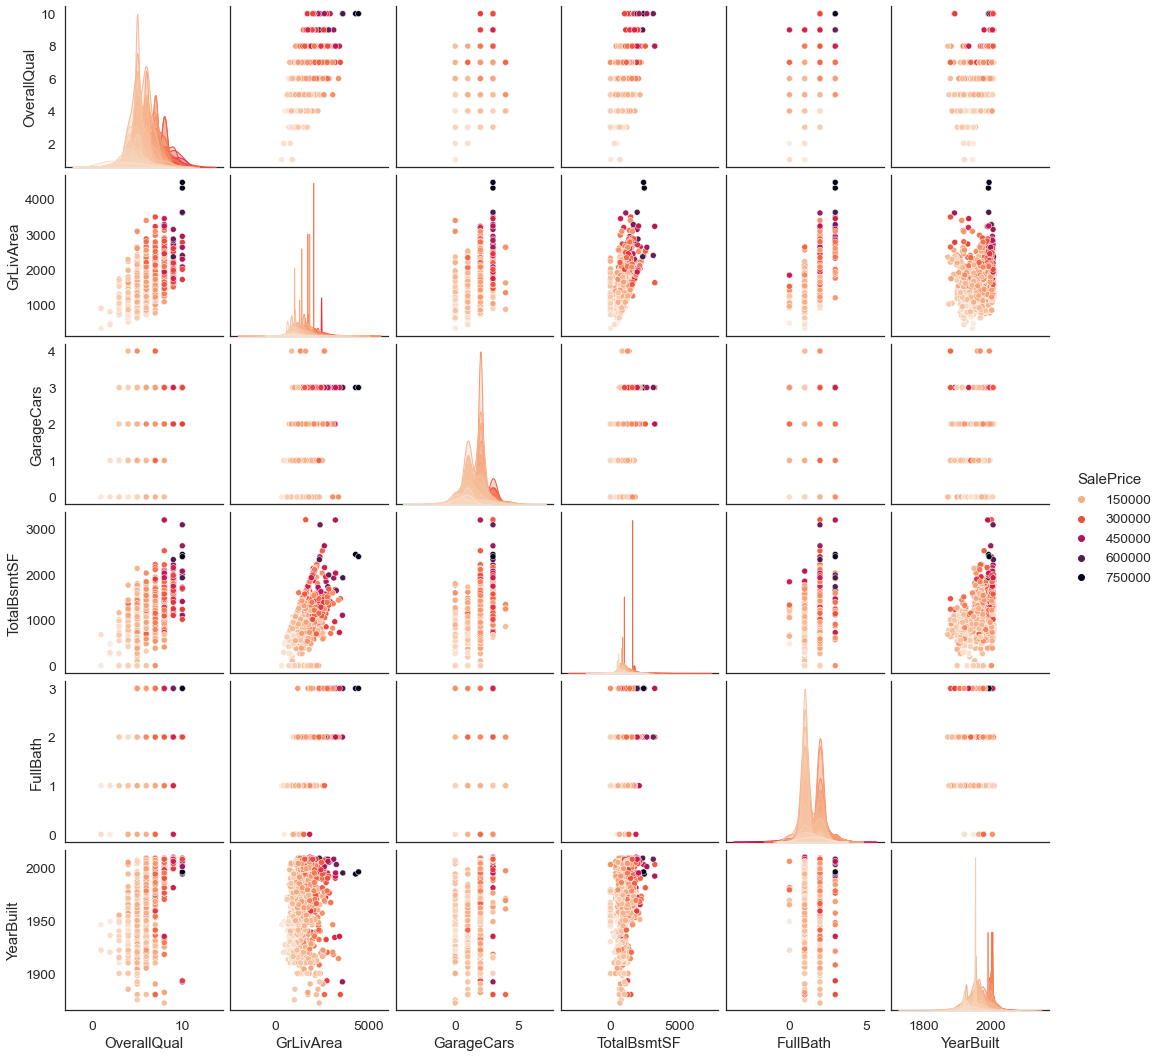

In [695]:
#scatterplot
#sns.set()
sns.set_style('white')

cols = ['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data = df_train[cols], size=2.5, height=2, hue='SalePrice', palette='rocket_r')
plt.show();

# Section II. DATA PRE-PROCESSING

## Transformation of SalePrice


 mu = 180932.92 and sigma = 79467.79



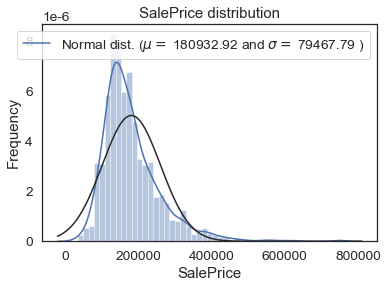

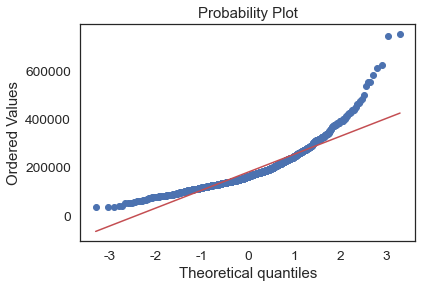

In [696]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);

#fig = plt.figure()
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()


'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line. In case of positive skewness, log transformations usually works well


 mu = 12.02 and sigma = 0.40



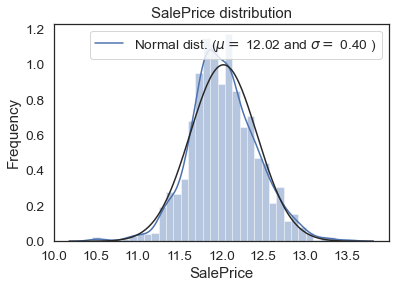

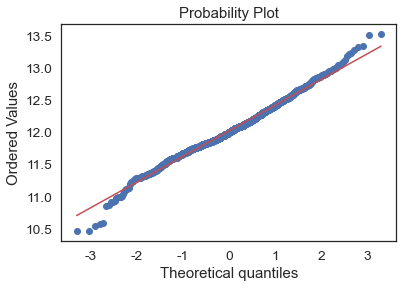

In [697]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])
#all_data['SalePrice'][:ntrain] = np.log1p(all_data['SalePrice'][:ntrain])

#transformed histogram and normal probability plot
#Check the new distribution 
sns.distplot(df_train['SalePrice'], fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

## Outliers Detection - IsolationForest

In [698]:
X = df_train[['SalePrice']]

In [699]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples='auto', 
                      random_state = 1, 
                      contamination= 0.02)
preds = clf.fit_predict(X)
df_train['isoletionForest_outliers'] = preds
df_train['isoletionForest_outliers'] = df_train['isoletionForest_outliers'].astype(str)
df_train['isoletionForest_scores'] = clf.decision_function(X)

In [700]:
df_train = df_train[df_train['isoletionForest_outliers']!='-1']

In [701]:
#contact train datasets with test datasets
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
y_train=df_train.pop('SalePrice').values
all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
#all_data.drop(['SalePrice'], axis=1, inplace=True)
all_data.head(10)
all_data.shape

(2887, 81)

In [702]:
all_data = all_data.drop(columns = ["isoletionForest_outliers","isoletionForest_scores"])

In [703]:
#all_data.drop(['SalePrice'], axis=1, inplace=True)
print("total data size is : {}".format(all_data.shape))

total data size is : (2887, 79)


## Imputing missing values

In [704]:
print(pd.isnull(all_data).sum())
all_data.isnull().sum().sort_values(ascending=False).head(10)

MSSubClass         0
MSZoning           4
LotFrontage      485
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64


PoolQC          2879
MiscFeature     2784
Alley           2694
Fence           2322
FireplaceQu     1402
LotFrontage      485
GarageYrBlt      149
GarageFinish     149
GarageQual       149
GarageCond       149
dtype: int64

In [705]:
#dealing with missing data
# all_data = all_data.drop((missing_data[missing_data['Total'] > 0]).index,1)
#df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
# all_data.isnull().sum().max() #just checking that there's no missing data missing...

all_data_na = (all_data.isnull().sum() / len(all_data)) * 100

percent_all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)

total_all_data_na = all_data.isnull().sum().sort_values(ascending=False)

#missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data = pd.concat([total_all_data_na, percent_all_data_na], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
PoolQC,2879,99.723
MiscFeature,2784,96.432
Alley,2694,93.315
Fence,2322,80.430
FireplaceQu,1402,48.563
LotFrontage,485,16.799
GarageYrBlt,149,5.161
GarageFinish,149,5.161
GarageQual,149,5.161
GarageCond,149,5.161


Text(0.5, 1.0, 'Percent missing data by feature')

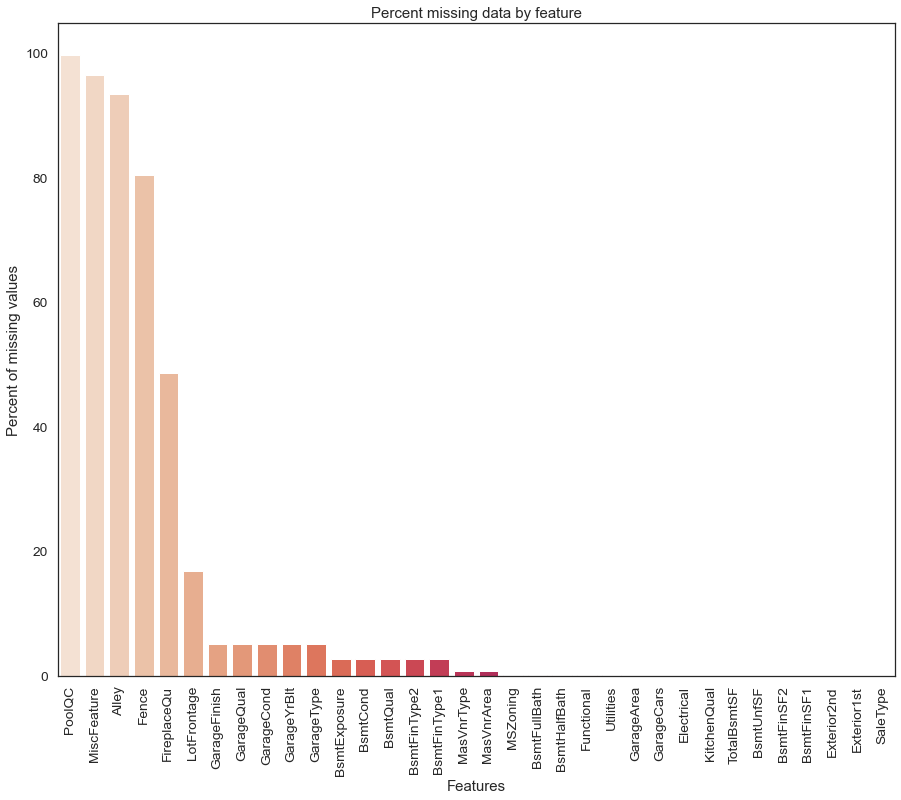

In [706]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=percent_all_data_na.index, y=percent_all_data_na, palette="rocket_r")
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [707]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform( lambda x: x.fillna(x.median()))
#all_data['MSZoning'] = all_data.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
for col in ('GarageFinish','GarageQual','GarageCond','GarageType',):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtExposure','BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0]) #Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0]) 
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")
all_data['Utilities'] = all_data['Utilities'].fillna("AllPub") 

In [708]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


### So it remains no missing value in training data.

In [709]:
#We start deleting the features with more than half of null value
all_data = all_data.drop(['PoolQC', 'Fence', 'MiscFeature', 'Alley'], axis=1)

all_data['YrBltAndRemod']=all_data['YearBuilt']+all_data['YearRemodAdd']
all_data['TotalSF']=all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['Total_sqr_footage'] = (all_data['BsmtFinSF1'] + all_data['BsmtFinSF2'] + all_data['1stFlrSF'] + all_data['2ndFlrSF'])
all_data['Total_Bathrooms'] = (all_data['FullBath'] + (0.5 * all_data['HalfBath']) + all_data['BsmtFullBath'] + (0.5 * all_data['BsmtHalfBath']))
all_data['Total_porch_sf'] = (all_data['OpenPorchSF'] + all_data['3SsnPorch'] + all_data['EnclosedPorch'] + all_data['ScreenPorch'] + all_data['WoodDeckSF'])

all_data['haspool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['has2ndfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasgarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
#all_data['hasbsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasfireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [710]:
print(all_data.shape)

(2887, 84)


## Transformation of GrLivArea Comparison of GrLivArea in a normal distribution

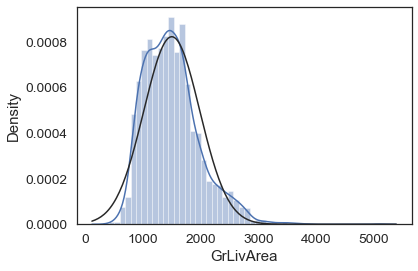

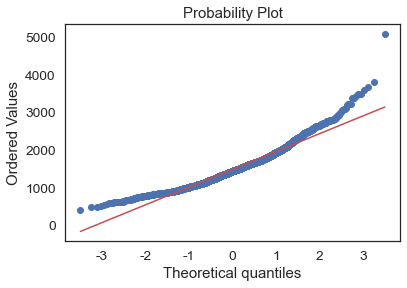

In [711]:
#histogram and normal probability plot
sns.distplot(all_data['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(all_data['GrLivArea'], plot=plt)

## Transforms GrLivArea into a normal distribution

In [712]:
#data transformation
all_data['GrLivArea'] = np.log1p(all_data['GrLivArea'])

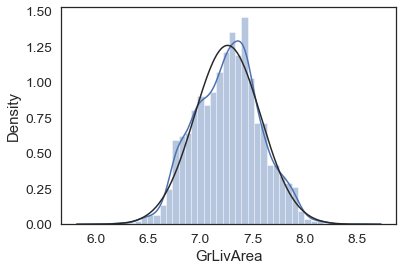

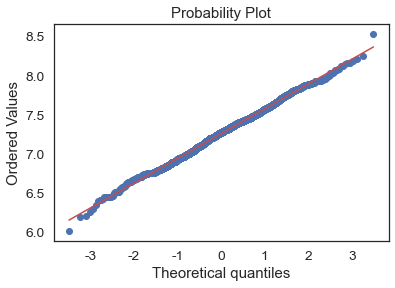

In [713]:
#transformed histogram and normal probability plot
sns.distplot(all_data['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(all_data['GrLivArea'], plot=plt)

## Transformation of TotalBsmtSF Comparison of TotalBsmtSF in a normal distribution

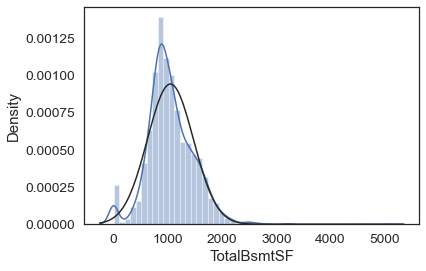

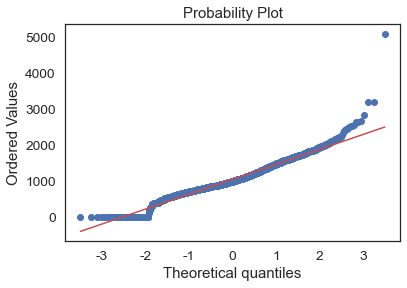

In [714]:
#histogram and normal probability plot
sns.distplot(all_data['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(all_data['TotalBsmtSF'], plot=plt)

## Transform totalBsmtSF to Binary categorical features

In [715]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0

#add one more feature
all_data['HasBsmt'] = pd.Series(len(all_data['TotalBsmtSF']), index=all_data.index)
all_data['HasBsmt'] = 0 
all_data.loc[all_data['TotalBsmtSF']>0,'HasBsmt'] = 1

In [716]:
#transform data
all_data.loc[all_data['HasBsmt']==1,'TotalBsmtSF']= np.log1p(all_data['TotalBsmtSF'])

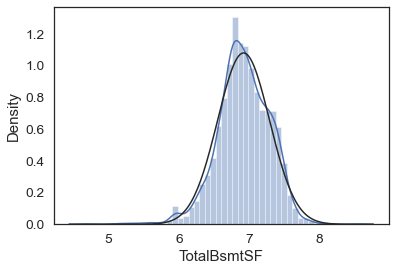

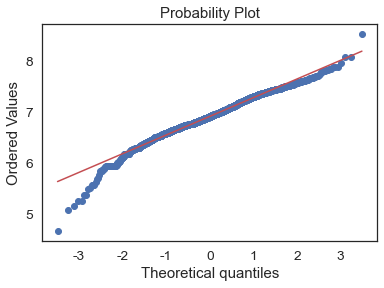

In [717]:
#histogram and normal probability plot
sns.distplot(all_data[all_data['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(all_data[all_data['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

## Transforming some numerical variables that are really categorical

In [718]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [719]:
numeric_cols = all_data.columns[all_data.dtypes != 'object']
numeric_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'YrBltAndRemod', 'TotalSF',
       'Total_sqr_footage', 'Total_Bathrooms', 'Total_porch_sf', 'haspool',
       'has2ndfloor', 'hasgarage', 'hasfireplace', 'HasBsmt'],
      dtype='object')

##  Label Encoding some categorical variables that may contain information in their ordering set

In [720]:
# Creating a new numeric ordinal variable for external conditon or 'ExterCond'
def kitchenqual_numeric(x):
    if 'Ex' in x:
        return 5
    elif 'Gd' in x:
        return 4
    elif 'TA' in x:
        return 3
    elif 'Fa' in x:
        return 2
    else:
        return 1
    
all_data['KitchenQual'] = all_data.KitchenQual.map(kitchenqual_numeric)

In [721]:
# Creating a new numeric ordinal variable for external quality or 'ExterQual'
def exterqual_numeric(x):
    if 'Ex' in x:
        return 5
    elif 'Gd' in x:
        return 4
    elif 'TA' in x:
        return 3
    elif 'Fa' in x:
        return 2
    else:
        return 1
    
all_data['ExterQual'] = all_data.ExterQual.map(exterqual_numeric)

In [722]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 'ExterCond','HeatingQC', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
#'PoolQC','Street'',Fence', 'Alley'
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2887, 85)


In [723]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,22.176
PoolArea,18.611
haspool,16.108
LotArea,13.324
LowQualFinSF,12.021
3SsnPorch,11.312
LandSlope,5.035
KitchenAbvGr,4.293
BsmtFinSF2,4.138
EnclosedPorch,4.018


In [724]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 64 skewed numerical features to Box Cox transform


# III. FEATURES ENGINEERING

## Final Datasets

In [725]:
all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,YrBltAndRemod,TotalSF,Total_sqr_footage,Total_Bathrooms,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasfireplace,HasBsmt
0,2.886,RL,5.831,19.212,Pave,1.541,Lvl,AllPub,Inside,0.000,...,16.472,14.977,14.782,1.687,5.715,0.000,0.730,0.730,0.000,0.730
1,2.056,RL,6.221,19.712,Pave,1.541,Lvl,AllPub,FR2,0.000,...,16.425,14.923,14.540,1.378,9.010,0.000,0.000,0.730,0.730,0.730
2,2.886,RL,5.915,20.347,Pave,0.000,Lvl,AllPub,Inside,0.000,...,16.469,15.150,14.585,1.687,5.053,0.000,0.730,0.730,0.730,0.730
3,3.011,RL,5.685,19.692,Pave,0.000,Lvl,AllPub,Corner,0.000,...,16.365,14.857,14.077,1.194,9.080,0.000,0.730,0.730,0.730,0.730
4,2.886,RL,6.315,21.325,Pave,0.000,Lvl,AllPub,FR2,0.000,...,16.466,15.852,15.323,1.687,8.832,0.000,0.730,0.730,0.730,0.730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2882,1.194,RM,3.933,14.081,Pave,1.541,Lvl,AllPub,Inside,0.000,...,16.414,13.568,12.375,0.982,0.000,0.000,0.730,0.000,0.000,0.730
2883,1.194,RM,3.933,14.013,Pave,1.541,Lvl,AllPub,Inside,0.000,...,16.414,13.568,12.977,0.982,4.138,0.000,0.730,0.730,0.000,0.730
2884,2.056,RL,7.620,22.782,Pave,1.541,Lvl,AllPub,Inside,0.000,...,16.428,14.824,14.824,1.194,10.137,0.000,0.000,0.730,0.730,0.730
2885,3.341,RL,5.744,20.047,Pave,1.541,Lvl,AllPub,Inside,0.000,...,16.453,13.994,12.895,0.982,6.881,0.000,0.000,0.000,0.000,0.730


In [726]:
all_data = all_data.drop(['1stFlrSF', 'GarageArea', 'TotRmsAbvGrd','MSSubClass'], axis=1)

In [727]:
df_train=all_data[:ntrain]
df_test=all_data[ntrain:]

In [728]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics = []
for i in df_train.columns:
    if df_train[i].dtype in numeric_dtypes:
        numerics.append(i)
numerics
df_train = df_train[numerics]
df_train

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df_train):
    vif = pd.DataFrame()
    vif["index"] = df_train.columns
    vif["VIF"] = [variance_inflation_factor(df_train.values, i) for i in range(df_train.shape[1])]    
    return(vif)
  
vif = calculate_vif(df_train)
while vif['VIF'][vif['VIF'] > 10].any():
    remove = vif.sort_values('VIF',ascending=0)['index'][:1]
    df_train.drop(remove,axis=1,inplace=True)
    vif = calculate_vif(df_train)
    
vif.sort_values(by = "VIF",ascending=False)

,index,VIF
7,BsmtUnfSF,9.694
22,MoSold,8.703
5,BsmtFinSF1,6.549
4,BsmtFinType1,6.387
3,BsmtExposure,6.334
14,GarageFinish,4.640
23,YrSold,3.482
10,BsmtFullBath,3.308
24,has2ndfloor,3.143
0,LotShape,3.119


In [729]:
#all_data = all_data.drop(columns = ["BsmtUnfSF"])

In [730]:
df_train=all_data[:ntrain]
df_test=all_data[ntrain:]

## Getting dummy variables

In [731]:
all_data_dummy = pd.get_dummies(all_data)
df_train_dummy = all_data_dummy[:ntrain]
df_test_dummy = all_data_dummy[ntrain:]
# Convert to numpy array
# df_train_dummy = np.array(df_train_dummy)
#y_train=df_train.pop('SalePrice').values
#y_train = np.log1p(df_train.pop('SalePrice')) #df.pop()
all_data_dummy.shape

(2887, 219)

In [732]:
y  = np.array(y_train)
len(y)

1428

In [733]:
df_train_dummy_list = list(df_train_dummy.columns)
len(df_train_dummy_list)

219

In [734]:
train=df_train_dummy
test=df_test_dummy

In [735]:
train

,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,5.831,19.212,1.541,0.000,2.440,1.820,14.188,14.188,8.059,1.820,...,0,0,0,1,0,0,0,0,1,0
1,6.221,19.712,1.541,0.000,2.260,2.440,14.145,14.145,0.000,1.541,...,0,0,0,1,0,0,0,0,1,0
2,5.915,20.347,0.000,0.000,2.440,1.820,14.184,14.186,7.647,1.820,...,0,0,0,1,0,0,0,0,1,0
3,5.685,19.692,0.000,0.000,2.440,1.820,14.048,14.136,0.000,1.541,...,0,0,0,1,1,0,0,0,0,0
4,6.315,21.325,0.000,0.000,2.603,1.820,14.183,14.183,9.392,1.820,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,5.744,18.961,1.541,0.000,2.260,1.820,14.181,14.183,0.000,1.541,...,0,0,0,1,0,0,0,0,1,0
1424,6.338,20.995,1.541,0.000,2.260,2.056,14.148,14.164,7.004,1.541,...,0,0,0,1,0,0,0,0,1,0
1425,5.860,19.476,1.541,0.000,2.440,2.603,14.089,14.192,0.000,2.056,...,0,0,0,1,0,0,0,0,1,0
1426,5.915,19.760,1.541,0.000,2.056,2.056,14.104,14.177,0.000,1.541,...,0,0,0,1,0,0,0,0,1,0


In [736]:
X = train
len(X)

1428

In [737]:
test

,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1428,6.221,20.479,1.541,0.000,2.056,2.056,14.121,14.121,0.000,1.541,...,0,0,0,1,0,0,0,0,1,0
1429,6.245,21.327,0.000,0.000,2.260,2.056,14.117,14.117,6.808,1.541,...,0,0,0,1,0,0,0,0,1,0
1430,6.073,21.197,0.000,0.000,2.056,1.820,14.178,14.180,0.000,1.541,...,0,0,0,1,0,0,0,0,1,0
1431,6.173,19.865,0.000,0.000,2.260,2.056,14.180,14.180,3.859,1.541,...,0,0,0,1,0,0,0,0,1,0
1432,5.094,17.257,0.000,0.000,2.603,1.820,14.170,14.170,0.000,1.820,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2882,3.933,14.081,1.541,0.000,1.820,2.260,14.136,14.136,0.000,1.541,...,0,0,0,1,0,0,0,0,1,0
2883,3.933,14.013,1.541,0.000,1.820,1.820,14.136,14.136,0.000,1.541,...,0,0,0,1,1,0,0,0,0,0
2884,7.620,22.782,1.541,0.000,2.056,2.260,14.120,14.177,0.000,1.541,...,0,0,0,1,1,0,0,0,0,0
2885,5.744,20.047,1.541,0.000,2.056,1.820,14.170,14.170,0.000,1.541,...,0,0,0,1,0,0,0,0,1,0


In [738]:
df_train_list = list (train.columns)
df_test_list = list(test.columns)
len(df_train_list)
len(df_test_list)

219

# IV. DATA MODELLING

In [739]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

## Cross Validation Function - K-Fold cross-validation RMSLE

In [740]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score

#K-Fold cross-validation RMSLE

n_folds = 5
rng = np.random.RandomState(42)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=rng).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, X.values, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

## Linear Regressor

In [741]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

In [742]:
# Linear Regression
lr = LinearRegression()
lr.fit(X, y)
score = rmsle_cv(lr)
print("\nLinearRegression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


LinearRegression score: 58291.2147 (36562.6426)



Training df_train Shape: (1071, 219)
Training Labels Shape: (1071,)
Testing df_train Shape: (357, 219)
Testing Labels Shape: (357,)


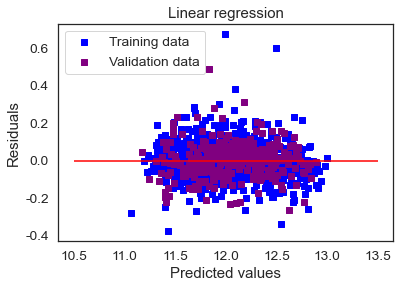

In [743]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_df_train, test_df_train, train_labels, test_labels = train_test_split(X, y, test_size = 0.25, random_state = 0)

print('Training df_train Shape:', train_df_train.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing df_train Shape:', test_df_train.shape)
print('Testing Labels Shape:', test_labels.shape)

x_train = train_df_train
y_train = train_labels
x_test = test_df_train
y_test = test_labels

y_train_pred = lr.predict(train_df_train)
y_test_pred = lr.predict(test_df_train)
# Plot residuals
plt.scatter(y_train_pred, y_train_pred - train_labels, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - test_labels, c = "purple", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

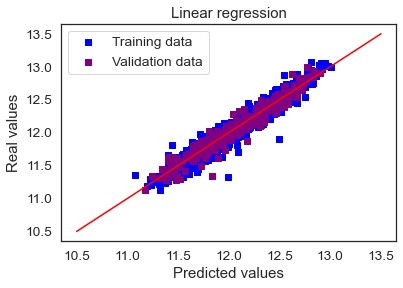

In [744]:
# Plot predictions
plt.scatter(y_train_pred,train_labels, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, test_labels, c = "purple", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

## Lasso Regressor

In [745]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1013 (0.0069)



In [746]:
from sklearn.linear_model import LassoCV

lassoCV = LassoCV(cv=5, random_state=101)
lassoCV.fit(X,y)
print("LassoCV Best Alpha Scored: ", lassoCV.alpha_)
print("LassoCV Model Accuracy: ", lassoCV.score(X, y))
lassoModel_coef = pd.Series(lassoCV.coef_, index = list(X.columns))
print("Variables Eliminated: ", str(sum(lassoModel_coef == 0)))
print("Variables Kept: ", str(sum(lassoModel_coef != 0)))

LassoCV Best Alpha Scored:  0.0006052854028914428
LassoCV Model Accuracy:  0.9305112316182824
Variables Eliminated:  132
Variables Kept:  87


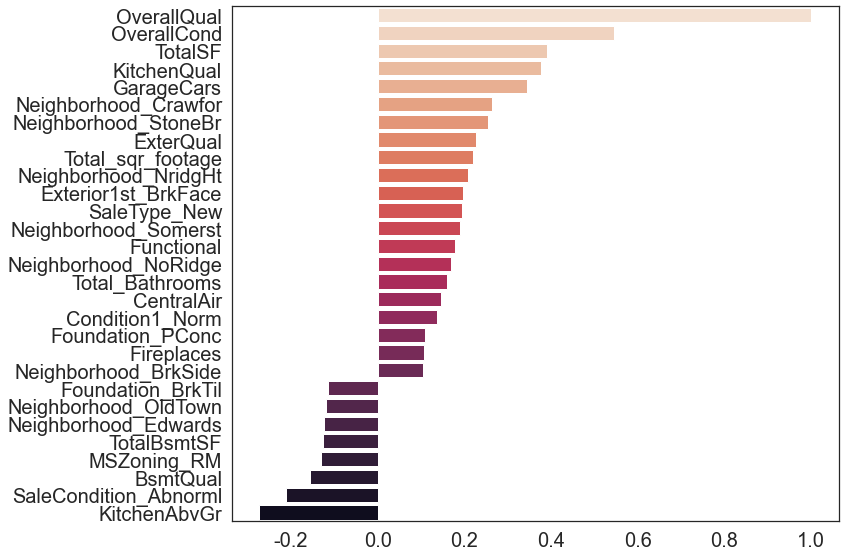

In [747]:
# Create plot data
plot_data = pd.DataFrame(zip(df_train_list, lassoModel_coef),
             columns = ['Feature', 'Importance'])
plot_data = plot_data.sort_values(by = 'Importance', ascending = False)
plot_data['Importance'] = plot_data['Importance'].values / plot_data['Importance'].values.max()

# Plot importance coefficient at least 0.1
f, ax = plt.subplots(figsize = (12,8))
sns.barplot(data=plot_data.loc[abs(plot_data.Importance)>=0.1], 
            y='Feature', 
            x='Importance',
            palette='rocket_r')
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(axis='both', which='major', labelsize=20)
f.tight_layout()

In [749]:
good_features = list()
good_features = list(plot_data.loc[plot_data.Importance!=0].Feature.values)
keep_features = list()
[keep_features.append(i) for i in good_features if not i in keep_features]  # append别忘记添加参数
len(keep_features)

87

## Elastic Net Regressor

In [750]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1012 (0.0070)



In [751]:
from sklearn.linear_model import ElasticNetCV

ElasticNetCv = ElasticNetCV(cv=5, random_state=101)
ElasticNetCv.fit(X,y)
print("ElasticNetCV Best Alpha Scored: ", ElasticNetCv.alpha_)
print("ElasticNetCV Model Accuracy: ", ElasticNetCv.score(X, y))

ElasticNetModel_coef = pd.Series(ElasticNetCv.coef_, index = list(X.columns))
print("Variables Eliminated: ", str(sum(ElasticNetModel_coef == 0)))
print("Variables Kept: ", str(sum(ElasticNetModel_coef != 0)))

ElasticNetCV Best Alpha Scored:  0.0012105708057828857
ElasticNetCV Model Accuracy:  0.9303668008399044
Variables Eliminated:  131
Variables Kept:  88


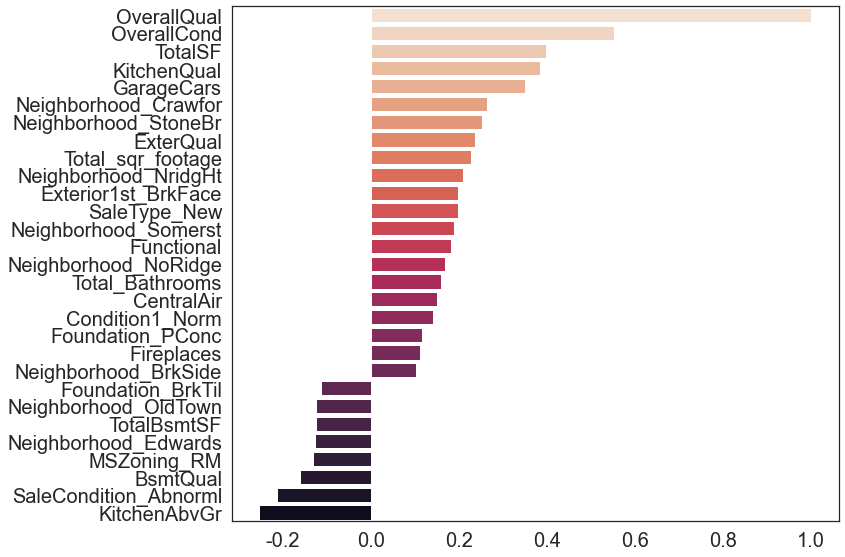

In [752]:
# Create plot data
plot_data = pd.DataFrame(zip(df_train_list, ElasticNetModel_coef ),
             columns = ['Feature', 'Importance'])
plot_data = plot_data.sort_values(by = 'Importance', ascending = False)
plot_data['Importance'] = plot_data['Importance'].values / plot_data['Importance'].values.max()

# Plot importance coefficient at least 0.1
f, ax = plt.subplots(figsize = (12,8))
sns.barplot(data=plot_data.loc[abs(plot_data.Importance)>=0.1], 
            y='Feature', 
            x='Importance',
            palette='rocket_r')
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(axis='both', which='major', labelsize=20)
f.tight_layout()

In [753]:
good_features = list(plot_data.loc[plot_data.Importance!=0].Feature.values)
[keep_features.append(i) for i in good_features if not i in keep_features]  # append别忘记添加参数
len(keep_features)

88

## Kernel Ridge Regressor

In [754]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1019 (0.0077)



In [755]:
from sklearn.linear_model import RidgeCV

RidgeCv = RidgeCV(cv=5)
RidgeCv.fit(X,y)
print("ElasticNetCV Best Alpha Scored: ", RidgeCv.alpha_)
print("ElasticNetCV Model Accuracy: ", RidgeCv.score(X, y))
RidgeModel_coef = pd.Series(RidgeCv.coef_, index = list(X.columns))
print("Variables Eliminated: ", str(sum(RidgeModel_coef == 0)))
print("Variables Kept: ", str(sum(RidgeModel_coef != 0)))

ElasticNetCV Best Alpha Scored:  10.0
ElasticNetCV Model Accuracy:  0.9364197350861541
Variables Eliminated:  0
Variables Kept:  219


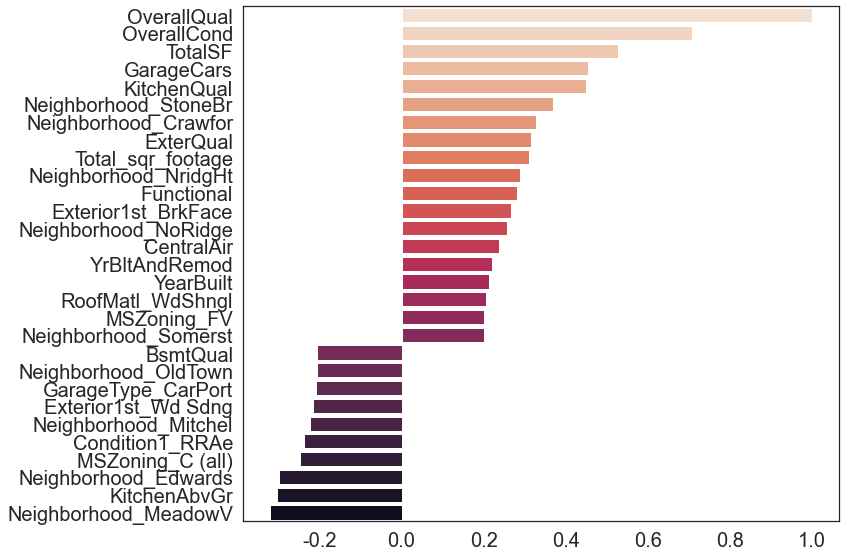

In [756]:
# Create plot data
plot_data = pd.DataFrame(zip(df_train_list, RidgeModel_coef ),
             columns = ['Feature', 'Importance'])
plot_data = plot_data.sort_values(by = 'Importance', ascending = False)
plot_data['Importance'] = plot_data['Importance'].values / plot_data['Importance'].values.max()

# Plot importance coefficient at least 0.1
f, ax = plt.subplots(figsize = (12,8))
sns.barplot(data=plot_data.loc[abs(plot_data.Importance)>=0.2], 
            y='Feature', 
            x='Importance',
            palette='rocket_r')
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(axis='both', which='major', labelsize=20)
f.tight_layout()

In [757]:
good_features = list(plot_data.loc[abs(plot_data.Importance)>0.1].Feature.values)
[keep_features.append(i) for i in good_features if not i in keep_features] 
len(keep_features)

105

In [758]:
len(good_features)

69

In [778]:
unscaled_coef = lassoModel_coef

In [779]:
unscaled_coef

LotFrontage              0.003
LotArea                  0.019
LotShape                -0.002
LandSlope                0.000
OverallQual              0.275
                         ...  
SaleCondition_AdjLand   -0.000
SaleCondition_Alloca     0.000
SaleCondition_Family    -0.019
SaleCondition_Normal     0.000
SaleCondition_Partial    0.000
Length: 219, dtype: float64

In [781]:
import math

transformed_coef = []
for i in unscaled_coef:
    j = math.exp(i)
    transformed_coef.append(j)
print(transformed_coef)

coef_effect = [(i - 1)*np.expm1(y).mean() for i in transformed_coef]
var_impact = pd.DataFrame(data=[X.columns, coef_effect]).T
var_impact.columns = ["variable", "1-unit change"]

var_impact.sort_values(by = '1-unit change', ascending = False).head(20)

[1.003441317191021, 1.0191110083272847, 0.9983537665311777, 1.0, 1.3169772995762932, 1.1617084547041763, 1.0, 1.0, 1.000979058581353, 1.0646443267668215, 1.0, 0.9580879115418666, 1.0068118204418193, 0.9906179045823688, 0.996298123659498, 0.9990574859008945, 0.9914124704789351, 0.9957902234362513, 0.9987521812580651, 0.9656033835503123, 0.980799392242474, 1.0408453749677116, 0.9997668304475398, 1.003341690202773, 1.0, 1.0, 1.0, 1.000559323322242, 1.0217330082548959, 0.9950248217571649, 0.9275710730570962, 1.1096410643848407, 1.0502476358051323, 1.0300618669415456, 0.999069464356124, 0.9988820647985843, 0.9887009065288077, 1.0998058584579158, 1.0001118627455443, 1.0027528362581706, 1.0100578675750491, 1.0053118242466834, 1.004082310944107, 1.0019972359806826, 1.0039183396105609, 1.0059878428225795, 1.0059334617029412, 0.9991271289994433, 1.0054512705098066, 0.9975008287827816, 1.0, 1.113192945612119, 1.0622686070914797, 1.0450188580554993, 0.9962418665342315, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0

,variable,1-unit change
4,OverallQual,56993.629
5,OverallCond,29075.746
51,TotalSF,20352.488
31,KitchenQual,19713.847
37,GarageCars,17945.443
84,Neighborhood_Crawfor,13512.507
100,Neighborhood_StoneBr,13067.972
9,ExterQual,11623.276
52,Total_sqr_footage,11196.114
94,Neighborhood_NridgHt,10644.867


## Ensembling1 - Random Forest Regressor

In [462]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score

#K-Fold cross-validation RMSLE

n_folds = 5
rng = np.random.RandomState(42)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=rng).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

def rmsle_cv2(model, x, y):
    kf = KFold(n_folds, shuffle=True, random_state=rng).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [463]:
#Normal without Hypeparameter tuning#

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

from subprocess import check_output
from datetime import time

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, criterion='mse', min_samples_split=2, 
                      min_samples_leaf=1, random_state = 42)

# Train the model on training data
rf.fit(X, y);

# Print Normal Random Forest without Hypaparameter tuning - RMSLE Score Using CV 
score = rmsle_cv(rf)
print("Random Forest Without Tuning score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))
#Random Forest Without Tuning score: 0.1230 (0.0077)

Random Forest Without Tuning score: 0.1228 (0.0078)



In [464]:
# Hyperparameter tuning #

rng = np.random.RandomState(42)

def rf_fn(params):
    
    params = {'n_estimators' : int(params['n_estimators']),
              'max_depth' : int(params['max_depth']),
              'min_samples_leaf' : int(params['min_samples_leaf']),
              'max_features' : int(params['max_features']),}
    model = RandomForestRegressor(random_state=rng, **params, n_jobs=-1)        
    rmse_score = np.mean(rmsle_cv(model))
    return rmse_score

In [ ]:
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK

space = {'n_estimators' : hp.quniform('n_estimators', low=1000, high=4000, q=250),
         'max_depth' : hp.quniform('max_depth', low=1, high=10, q=1),
         'min_samples_leaf' : hp.quniform('min_samples_leaf', low=1, high=20, q=1),
         'max_features' : hp.quniform('max_features', low=1, high=15, q=1),
         'max_samples' : hp.uniform('max_samples', low=0.5, high=0.8),}

trials = Trials()
rf_best_params = fmin(fn=rf_fn, 
                       space=space, 
                       algo=tpe.suggest, 
                       max_evals=25*5, 
                       trials=trials, 
                       rstate=rng)

param_list = ['n_estimators', 
              'max_depth',
              'min_samples_leaf',
              'max_features']

for param in param_list:
    rf_best_params[param] = int(rf_best_params[param])
    
#125/125 [20:04<00:00,  9.63s/trial, best loss: 0.12217595050729031]

In [465]:
rf_best_params = {'max_depth': 10,
 'max_features': 15,
 'max_samples': 0.771492739411171,
 'min_samples_leaf': 1,
 'n_estimators': 2500}

In [466]:
import pickle

rng = np.random.RandomState(42)

#pickle.dump(rf_best_params, open("rf.pkl", "wb"))
#rf_best_params

# Print Random Forest with Hypaparameter tuning - RMSLE Score Using CV 

#rf_best_params = pickle.load(open("rf.pkl", "rb"))
score = rf_fn(rf_best_params)
print("Random Forest score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))
#Random Forest score: 0.1222 (0.0000)

Random Forest score: 0.1226 (0.0000)



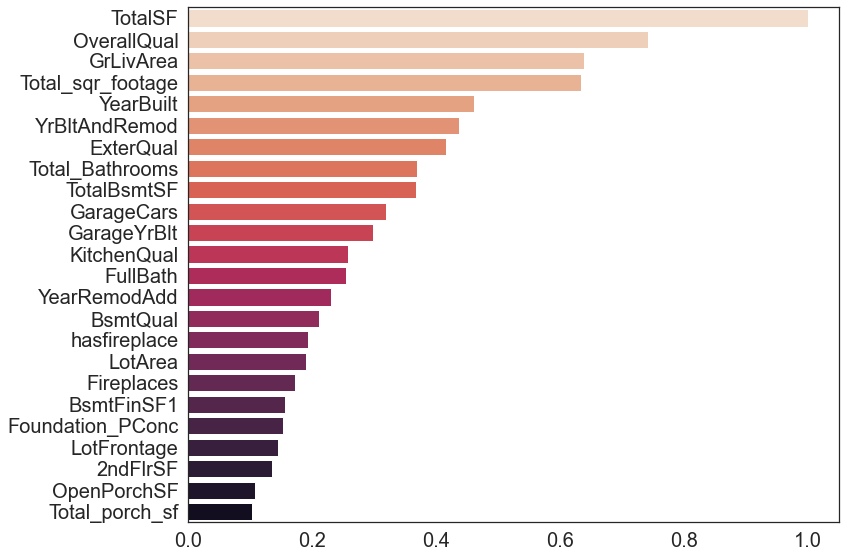

In [506]:
rng = np.random.RandomState(42)

# Fit Random Forest Best and plot
rf_best = RandomForestRegressor(random_state=rng, **rf_best_params)
rf_best.fit(X, y)

# Create plot data
plot_data = pd.DataFrame(zip(df_train_list, rf_best.feature_importances_),
             columns = ['Feature', 'Importance'])
plot_data = plot_data.sort_values(by = 'Importance', ascending = False)
plot_data['Importance'] = plot_data['Importance'].values / plot_data['Importance'].values.max()

# Plot importance at least 0.1
f, ax = plt.subplots(figsize = (12,8))
sns.barplot(data=plot_data.loc[plot_data.Importance>=0.1], 
            y='Feature', 
            x='Importance',
            palette='rocket_r')
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(axis='both', which='major', labelsize=20)
f.tight_layout()

In [507]:
# Store good features
good_features = list(plot_data.loc[plot_data.Importance>0.1].Feature.values)
[keep_features.append(i) for i in good_features if not i in keep_features]
len(keep_features)

110

In [508]:
len(good_features)

24

In [469]:
plot_data = plot_data.sort_values(by = 'Importance', ascending = False)
plot_data = plot_data.loc[plot_data.Importance>0]
important_indices = list(plot_data['Feature'])
# Filtering dataset
X_important = X.loc[:, important_indices]
# Train the random forest
score = rmsle_cv2(rf_best, X_important, y)
print("Random Forest score after Feature Selection: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))
#Random Forest score after Feature Selection: 0.1261 (0.0039)

Random Forest score after Feature Selection: 0.1231 (0.0047)



## Ensembling2 - Gradient Boosting Regressor

With huber loss that makes it robust to outliers

In [782]:
#Normal without Hypeparameter tuning#

# Import the model we are using
rng = np.random.RandomState(42)

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1021 (0.0074)



In [95]:
# Hyperparameter tuning #

rng = np.random.RandomState(42)

# Gradient Boosting Regressor function
def GBR_fn(params):
    
    params = {'n_estimators' : int(params['n_estimators']),
              'learning_rate' : params['learning_rate'],
              'max_depth' : int(params['max_depth']),
              'min_samples_leaf' : int(params['min_samples_leaf']),
              'max_features' : int(params['max_features']),}
    
    model = GradientBoostingRegressor(random_state=rng, loss='huber', **params)
        
    score = np.mean(rmsle_cv2(model, X, y))
    
    return score

In [241]:
# Hyperparameter tuning
space = {'n_estimators' : hp.quniform('n_estimators', low=2500, high=5000, q=250),
         'learning_rate' : hp.uniform('learning_rate', low=0.04, high=0.06),
         'min_samples_leaf' : hp.quniform('min_samples_leaf', low=1, high=10, q=1),
         'max_depth' : hp.quniform('max_depth', low=1, high=10, q=1),
         'max_features' : hp.quniform('max_features', low=1, high=9, q=1),}

trials = Trials()
GBR_best_params = fmin(
    fn = GBR_fn,
    space = space,
    algo = tpe.suggest,
    max_evals = 25*5,
    trials = trials,
    rstate = rng
)

param_list = ['n_estimators', 
              'max_depth',
              'min_samples_leaf',
              'max_features']
for param in param_list:
    GBR_best_params[param] = int(GBR_best_params[param])
    
pickle.dump(GBR_best_params, open("GBR.pkl", "wb"))
GBR_best_params

#100%|███████████████████████████████████████████| 125/125 [2:45:57<00:00, 79.66s/trial, best loss: 0.09873668134402946]
#{'learning_rate': 0.04168708157679709,
# 'max_depth': 3,
# 'max_features': 8,
# 'min_samples_leaf': 2,
# 'n_estimators': 3000}

100%|███████████████████████████████████████████| 125/125 [2:45:57<00:00, 79.66s/trial, best loss: 0.09873668134402946]


{'learning_rate': 0.04168708157679709,
 'max_depth': 3,
 'max_features': 8,
 'min_samples_leaf': 2,
 'n_estimators': 3000}

In [471]:
GBR_best_params = {'learning_rate': 0.04168708157679709,
 'max_depth': 3,
 'max_features': 8,
 'min_samples_leaf': 2,
 'n_estimators': 3000}
#pickle.dump(GBR_best_params, open("GBR.pkl", "wb"))

In [472]:
# Final score
#pickle.dump(GBR_best_params, open("GBR.pkl", "rb"))
score = GBR_fn(GBR_best_params)
print("Score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Score: 0.1012 (0.0000)



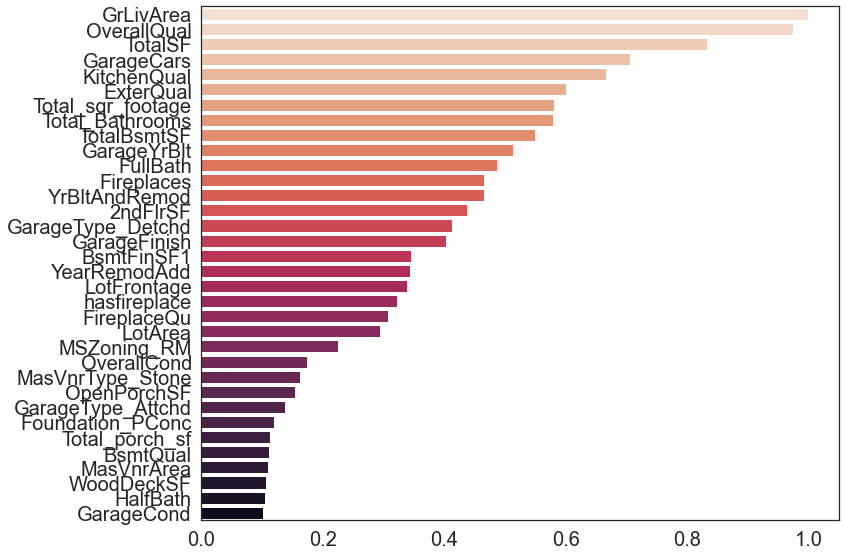

In [509]:
# Fit GBR Best and plot
rng = np.random.RandomState(42)
GBR_best = GradientBoostingRegressor(random_state=rng, **GBR_best_params)
GBR_best.fit(X, y)

# Create plot data
plot_data = pd.DataFrame(zip(df_train_list, GBR_best.feature_importances_),
             columns = ['Feature', 'Importance'])
plot_data = plot_data.sort_values(by = 'Importance', ascending = False)
plot_data['Importance'] = plot_data['Importance'].values / plot_data['Importance'].values.max()

# Plot importance coefficient at least 0.1
f, ax = plt.subplots(figsize = (12,8))
sns.barplot(data=plot_data.loc[plot_data.Importance>=0.1], 
            y='Feature', 
            x='Importance',
            palette='rocket_r')
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(axis='both', which='major', labelsize=20)
f.tight_layout()

In [510]:
# Store best features
good_features = list(plot_data.loc[plot_data.Importance>0.1].Feature.values)
[keep_features.append(i) for i in good_features if not i in keep_features]  # append别忘记添加参数
len(keep_features)

113

In [511]:
len(good_features)

34

In [475]:
plot_data = plot_data.sort_values(by = 'Importance', ascending = False)
plot_data = plot_data.loc[plot_data.Importance>0]
important_indices = list(plot_data['Feature'])
X_important = X.loc[:, important_indices]
score = rmsle_cv2(GBR_best, X_important, y)
print("GBR score after Feature Selection: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

GBR score after Feature Selection: 0.1021 (0.0061)



## Ensembling3 - XGBoost Regressor

In [764]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[13:15:08] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:15:11] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:15:13] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:15:16] WARNING: ..

In [765]:
rng = np.random.RandomState(42)

# Extreme Gradient Boosting function
def XGBR_fn(params):
    
    params = {'n_estimators' : int(params['n_estimators']),
              'max_depth' : int(params['max_depth']),
              'learning_rate' : params['learning_rate'],
              'min_child_weight':int(params['min_child_weight']),
              'subsample':params['subsample'],
              'colsample_bytree':params['colsample_bytree'],
              'reg_alpha':params['reg_alpha'],
              'reg_lambda':params['reg_lambda'],}
    
    model = XGBRegressor(random_state=rng, **params)
        
    score = np.mean(rmsle_cv2(model, X, y))

    return score

In [281]:
rng = np.random.RandomState(42)

# Hyperparameter tuning
space = {'n_estimators' : hp.quniform('n_estimators', low=3500, high=5500, q=250),
         'learning_rate': hp.uniform('learning_rate', low=0.03, high=0.07),
         'max_depth' : hp.quniform('max_depth', low=1, high=20, q=1),
         'min_child_weight':hp.quniform('min_child_weight', low=0, high=6, q=1),
         'subsample':hp.uniform('subsample', low=0.3, high=0.7),
         'colsample_bytree':hp.uniform('colsample_bytree', low=0.05, high=0.5),
         'reg_alpha':hp.uniform('reg_alpha', low=0, high=0.2),
         'reg_lambda':hp.uniform('reg_lambda', low=0.5, high=0.7),}

trials = Trials()
XGBR_best_params = fmin(
    fn = XGBR_fn,
    space = space,
    algo = tpe.suggest,
    max_evals = 25*5,
    trials = trials,
    rstate = rng
)

param_list = ['n_estimators', 
              'max_depth',
              'min_child_weight']
for param in param_list:
    XGBR_best_params[param] = int(XGBR_best_params[param])
    
#pickle.dump(XGBR_best_params, open("XGBR.pkl", "wb"))
XGBR_best_params

#100%|█████████████████████████████████████████████| 125/125 [37:17<00:00, 17.90s/trial, best loss: 0.10067654705821245]
#{'colsample_bytree': 0.19147300710127116,
# 'learning_rate': 0.03658308933582909,
# 'max_depth': 3,
# 'min_child_weight': 5,
# 'n_estimators': 3750,
# 'reg_alpha': 0.09436758313982165,
# 'reg_lambda': 0.5882928058482992,
# 'subsample': 0.5907065316412401}

100%|█████████████████████████████████████████████| 125/125 [37:17<00:00, 17.90s/trial, best loss: 0.10067654705821245]


{'colsample_bytree': 0.19147300710127116,
 'learning_rate': 0.03658308933582909,
 'max_depth': 3,
 'min_child_weight': 5,
 'n_estimators': 3750,
 'reg_alpha': 0.09436758313982165,
 'reg_lambda': 0.5882928058482992,
 'subsample': 0.5907065316412401}

In [766]:
XGBR_best_params = {'colsample_bytree': 0.19147300710127116,
 'learning_rate': 0.03658308933582909,
 'max_depth': 3,
 'min_child_weight': 5,
 'n_estimators': 3750,
 'reg_alpha': 0.09436758313982165,
 'reg_lambda': 0.5882928058482992,
 'subsample': 0.590706531641240,
 'rstate': rng
                   }

In [767]:
rng = np.random.RandomState(42)

#XGBR_best_params = pickle.load(open("XGBR.pkl", "rb"))
score = XGBR_fn(XGBR_best_params)
print("XGBR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

XGBR score: 0.1011 (0.0000)



[13:15:36] WARNING: ..\src\learner.cc:541: 
Parameters: { rstate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




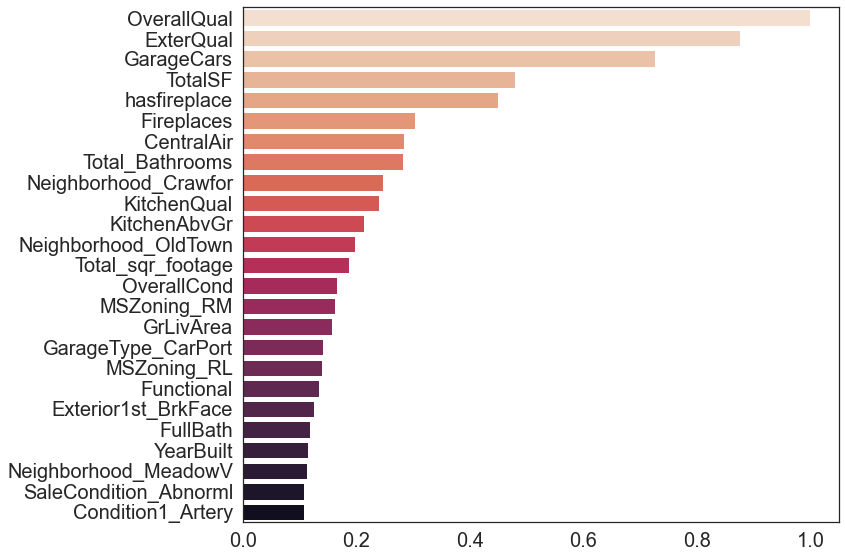

In [768]:
rng = np.random.RandomState(42)

# Fit XGBR Best and plot
XGBR_best = XGBRegressor(random_state=rng, **XGBR_best_params)
XGBR_best.fit(X, y)

# Create plot data
plot_data = pd.DataFrame(zip(df_train_list, XGBR_best.feature_importances_),
             columns = ['Feature', 'Importance'])
plot_data = plot_data.sort_values(by = 'Importance', ascending = False)
plot_data['Importance'] = plot_data['Importance'].values / plot_data['Importance'].values.max()

# Plot importance coefficient at least 0.1
f, ax = plt.subplots(figsize = (12,8))
sns.barplot(data=plot_data.loc[plot_data.Importance>0.1], 
            y='Feature', 
            x='Importance',
            palette='rocket_r')
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(axis='both', which='major', labelsize=20)
f.tight_layout()

In [513]:
# Store best features
good_features = list(plot_data.loc[plot_data.Importance>0.1].Feature.values)
[keep_features.append(i) for i in good_features if not i in keep_features]
len(keep_features)

113

In [514]:
len(good_features)

24

In [482]:
rng = np.random.RandomState(42)

plot_data = plot_data.sort_values(by = 'Importance', ascending = False)
plot_data = plot_data.loc[plot_data.Importance>0]
important_indices = list(plot_data['Feature'])
X_important =X.loc[:, important_indices]
score = rmsle_cv2(XGBR_best, X_important, y)
print("XGBR score after Feature Selection: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

[21:09:55] WARNING: ..\src\learner.cc:541: 
Parameters: { rstate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:09:59] WARNING: ..\src\learner.cc:541: 
Parameters: { rstate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:10:02] WARNING: ..\src\learner.cc:541: 
Parameters: { rstate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:10:05] WARNING: ..

## Ensembling4 - LightGBM Regressor

In [483]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

In [484]:
# Light Gradient Boosted Machine function
def LGBM_fn(params):
    
    params = {'n_estimators' : int(params['n_estimators']),
              'learning_rate' : params['learning_rate'],
              'max_depth' : int(params['max_depth']),
              'min_child_samples' : int(params['min_child_samples']),
              'num_leaves' : int(params['num_leaves']),
              'max_bin' : int(params['max_bin']),
              'subsample_freq' : int(params['subsample_freq']),
              'subsample' : params['subsample'],
              'reg_alpha' : params['reg_alpha'],
              'reg_lambda' : params['reg_lambda'],}
    
    model = LGBMRegressor(random_state=rng, **params)
        
    score = np.mean(rmsle_cv2(model, X, y))
    
    return score

In [299]:
# Hyperparameter tuning
space = {'n_estimators' : hp.quniform('n_estimators', low=2000, high=3000, q=250),
         'learning_rate' : hp.uniform('learning_rate', low=0.005, high=0.1),
         'max_depth' : hp.quniform('max_depth', low=1, high=10, q=1),
         'min_child_samples' : hp.quniform('min_child_samples', low=1, high=5, q=1),
         'num_leaves' : hp.quniform('num_leaves', low=1, high=30, q=2),
         'max_bin' : hp.quniform('max_bin', low=20, high=400, q=20),
         'subsample_freq' : hp.quniform('subsample_freq', low=5, high=10, q=1),
         'subsample' : hp.uniform('subsample', low=0.5, high=0.7),
         'reg_alpha' : hp.uniform('reg_alpha', low=0.2, high=0.4),
         'reg_lambda' : hp.uniform('reg_lambda', low=0.4, high=0.6),}

trials = Trials()
LGBM_best_params = fmin(
    fn = LGBM_fn,
    space = space,
    algo = tpe.suggest,
    max_evals = 25*5,
    trials = trials,
    rstate = rng
)

param_list = ['n_estimators', 
              'max_depth',
              'min_child_samples',
              'num_leaves',
              'max_bin',
              'subsample_freq']
for param in param_list:
    LGBM_best_params[param] = int(LGBM_best_params[param])
    
#pickle.dump(LGBM_best_params, open("LGBM.pkl", "wb"))
LGBM_best_params

#100%|█████████████████████████████████████████████| 125/125 [07:02<00:00,  3.38s/trial, best loss: 0.10377356055243832]
#{'learning_rate': 0.08323351268602924,
# 'max_bin': 400,
# 'max_depth': 3,
# 'min_child_samples': 1,
# 'n_estimators': 2750,
# 'num_leaves': 2,
# 'reg_alpha': 0.20882760912180415,
# 'reg_lambda': 0.4439541465309934,
# 'subsample': 0.6555370987789385,
# 'subsample_freq': 10}

100%|█████████████████████████████████████████████| 125/125 [07:02<00:00,  3.38s/trial, best loss: 0.10377356055243832]


{'learning_rate': 0.08323351268602924,
 'max_bin': 400,
 'max_depth': 3,
 'min_child_samples': 1,
 'n_estimators': 2750,
 'num_leaves': 2,
 'reg_alpha': 0.20882760912180415,
 'reg_lambda': 0.4439541465309934,
 'subsample': 0.6555370987789385,
 'subsample_freq': 10}

In [485]:
LGBM_best_params = {'learning_rate': 0.08323351268602924,
 'max_bin': 400,
 'max_depth': 3,
 'min_child_samples': 1,
 'n_estimators': 2750,
 'num_leaves': 2,
 'reg_alpha': 0.20882760912180415,
 'reg_lambda': 0.4439541465309934,
 'subsample': 0.6555370987789385,
 'subsample_freq': 10,  
                       }

In [486]:
rng = np.random.RandomState(42)

#LGBM_best_params = pickle.load(open("LGBM.pkl", "rb"))
score =  LGBM_fn(LGBM_best_params)
print("LGBM score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

LGBM score: 0.1051 (0.0000)



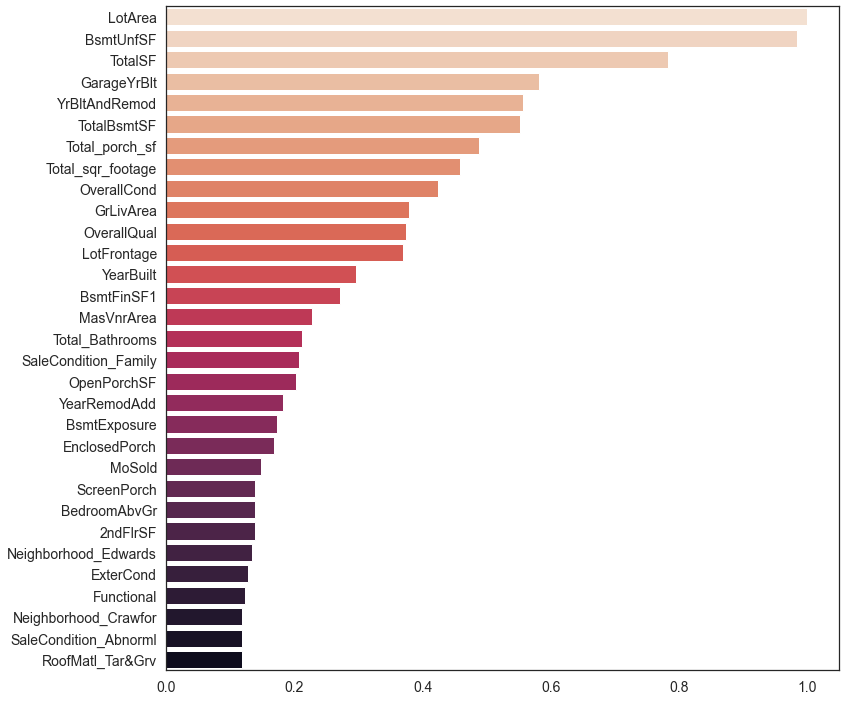

In [515]:
rng = np.random.RandomState(42)

# Fit LGBM Best and plot
LGBM_best = LGBMRegressor(random_state=rng, **LGBM_best_params)
LGBM_best.fit(X, y)

# Create plot data
plot_data = pd.DataFrame(zip(df_train_list, LGBM_best.feature_importances_),
             columns = ['Feature', 'Importance'])
plot_data = plot_data.sort_values(by = 'Importance', ascending = False)
plot_data['Importance'] = plot_data['Importance'].values / plot_data['Importance'].values.max()

# Plot importance coefficient at least 0.1
f, ax = plt.subplots(figsize = (12,10))
sns.barplot(data=plot_data.loc[plot_data.Importance>=0.1], 
            y='Feature', 
            x='Importance',
            palette='rocket_r')
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(axis='both', which='major', labelsize=14)
f.tight_layout()

In [516]:
rng = np.random.RandomState(42)

plot_data = plot_data.sort_values(by = 'Importance', ascending = False)
plot_data = plot_data.loc[plot_data.Importance>=0.1]
important_indices = list(plot_data['Feature'])
# Filtering dataset
X_important = X.loc[:, important_indices]

# Train the random forest
score = rmsle_cv2(LGBM_best, X_important, y)
print("Score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

Score: 0.1058 (0.0065)



## Keep Features

In [517]:
# Store best features
good_features = list(plot_data.loc[plot_data.Importance>0.1].Feature.values)
[keep_features.append(i) for i in good_features if not i in keep_features]
len(keep_features)

114

In [518]:
len(good_features)

31

In [519]:
keep_features

['OverallQual',
 'OverallCond',
 'TotalSF',
 'GarageCars',
 'Neighborhood_Crawfor',
 'Neighborhood_StoneBr',
 'Total_sqr_footage',
 'Exterior1st_BrkFace',
 'Total_Bathrooms',
 'CentralAir',
 'SaleType_New',
 'Functional',
 'Neighborhood_NoRidge',
 'Neighborhood_Somerst',
 'Neighborhood_NridgHt',
 'Condition1_Norm',
 'Foundation_PConc',
 'Fireplaces',
 'BldgType_1Fam',
 'MSZoning_FV',
 'LotConfig_CulDSac',
 'Neighborhood_BrkSide',
 'LotArea',
 'HalfBath',
 'Exterior1st_VinylSd',
 'PavedDrive',
 'BldgType_TwnhsE',
 'MasVnrType_Stone',
 'BsmtCond',
 'PoolArea',
 'HouseStyle_SLvl',
 'ScreenPorch',
 'GarageType_BuiltIn',
 'MoSold',
 'WoodDeckSF',
 'FullBath',
 'OpenPorchSF',
 'GarageQual',
 '3SsnPorch',
 'LowQualFinSF',
 'LotFrontage',
 'EnclosedPorch',
 'SaleCondition_Normal',
 'MasVnrArea',
 'GarageCond',
 'LotConfig_Corner',
 '2ndFlrSF',
 'GarageYrBlt',
 'MiscVal',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'Condition1_RRAe',
 'LotShape',
 'SaleType_WD',
 'BsmtFinType1',
 'Total_porch_sf',
 'YrSold',

In [520]:
X_Final = X.loc[:,keep_features]

## Voting - StackedRegressor, XGBoost and LightGBM

## （1）Stacked Regressor

In [522]:
from sklearn.ensemble import StackingRegressor

### Averaged base models class

class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X_Final, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X_Final, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

averaged_models = AveragingModels(models = (ENet, GBR_best, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.0974 (0.0074)



In [523]:
### Stacking averaged Models Class

class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=42)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)
    
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: nan (nan)


In [631]:
from sklearn.ensemble import StackingRegressor

# Stacking Regressor function
def Stacking_fn(params):
    
    params = {'n_estimators' : int(params['n_estimators']),
              'max_depth' : int(params['max_depth']),
              'learning_rate' : params['learning_rate'],
              'min_child_weight':int(params['min_child_weight']),
              'subsample':params['subsample'],
              'colsample_bytree':params['colsample_bytree'],
              'reg_alpha':params['reg_alpha'],
              'reg_lambda':params['reg_lambda'],}
    
    estimators = [
        ('XGBR_best', XGBR_best),
        ('(ENet', ENet),
        ('KRR', KRR),
        ('lasso', lasso),
        
    ]

    model = StackingRegressor(
        estimators = estimators,
        final_estimator = lasso,
        cv = n_folds,
        passthrough = True,
    )
        
    score = np.mean(rmsle_cv2(model, X_Final, y))
    
    return score

In [338]:
# Hyperparameter tuning
space = {'n_estimators' : hp.quniform('n_estimators', low=2000, high=6000, q=250),
         'learning_rate': hp.uniform('learning_rate', low=0.01, high=0.05),
         'max_depth' : hp.quniform('max_depth', low=1, high=10, q=1),
         'min_child_weight' : hp.quniform('min_child_weight', low=0, high=6, q=1),
         'subsample' : hp.uniform('subsample', low=0.4, high=0.6),
         'colsample_bytree' : hp.uniform('colsample_bytree', low=0.2, high=0.5),
         'reg_alpha' : hp.uniform('reg_alpha', low=0, high=0.2),
         'reg_lambda' : hp.uniform('reg_lambda', low=0.5, high=0.8),}

trials = Trials()
Stacking_best_params = fmin(
    fn = Stacking_fn,
    space = space,
    algo = tpe.suggest,
    max_evals = 25*5,
    trials = trials,
    rstate = rng
)

param_list = ['n_estimators', 
              'max_depth',
              'min_child_weight']
for param in param_list:
    Stacking_best_params[param] = int(Stacking_best_params[param])
    
#pickle.dump(Stacking_best_params, open("Stacking.pkl", "wb"))
Stacking_best_params
#100%|███████████████████████████████████████████| 125/125 [1:18:37<00:00, 37.74s/trial, best loss: 0.09665860489219297]

100%|███████████████████████████████████████████| 125/125 [1:18:37<00:00, 37.74s/trial, best loss: 0.09665860489219297]


{'colsample_bytree': 0.21160799729072557,
 'learning_rate': 0.023235338832493867,
 'max_depth': 1,
 'min_child_weight': 0,
 'n_estimators': 5000,
 'reg_alpha': 0.07386566527667451,
 'reg_lambda': 0.6920030004722074,
 'subsample': 0.5166738571283658}

In [632]:
Stacking_best_params = {'colsample_bytree': 0.21160799729072557,
 'learning_rate': 0.023235338832493867,
 'max_depth': 1,
 'min_child_weight': 0,
 'n_estimators': 5000,
 'reg_alpha': 0.07386566527667451,
 'reg_lambda': 0.6920030004722074,
 'subsample': 0.5166738571283658}

In [633]:
#Stacking_best_params = pickle.load(open("Stacking.pkl", "rb"))
score = Stacking_fn(Stacking_best_params)
print("Stacking score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

[23:26:29] WARNING: ..\src\learner.cc:541: 
Parameters: { rstate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:26:32] WARNING: ..\src\learner.cc:541: 
Parameters: { rstate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:26:35] WARNING: ..\src\learner.cc:541: 
Parameters: { rstate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:26:38] WARNING: ..

[23:27:48] WARNING: ..\src\learner.cc:541: 
Parameters: { rstate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:27:51] WARNING: ..\src\learner.cc:541: 
Parameters: { rstate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:27:54] WARNING: ..\src\learner.cc:541: 
Parameters: { rstate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:27:57] WARNING: ..

In [634]:
estimators = [
        ('XGBR_best', XGBR_best),
        ('(ENet', ENet),
        ('KRR', KRR),
        ('lasso', lasso),        
    ]
Stacking_best = StackingRegressor(
        estimators = estimators,
        final_estimator = XGBRegressor(random_state = rng, **Stacking_best_params),
        cv = n_folds,
        passthrough = True,
)

In [635]:
test_Final = test.loc[:,keep_features]

In [636]:
Stacking_best.fit(X_Final, y)
stacked_train_pred = Stacking_best.predict(X_Final)
stacked_pred = np.expm1(Stacking_best.predict(test_Final))
print(rmsle(y, stacked_train_pred))

[23:28:09] WARNING: ..\src\learner.cc:541: 
Parameters: { rstate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:28:12] WARNING: ..\src\learner.cc:541: 
Parameters: { rstate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:28:14] WARNING: ..\src\learner.cc:541: 
Parameters: { rstate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:28:17] WARNING: ..

## Extreme Gradient Boosting (XGB) Regressor

In [535]:
XGBR_best.fit(X_Final, y)
xgb_train_pred = XGBR_best.predict(X_Final)
xgb_pred = np.expm1(XGBR_best.predict(test_Final))
print(rmsle(y, xgb_train_pred))

[21:38:30] WARNING: ..\src\learner.cc:541: 
Parameters: { rstate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.024482766311474558


## Light Gradient Boosting Machine (LGBM) Regressor

In [536]:
LGBM_best.fit(X_Final, y)
lgb_train_pred = LGBM_best.predict(X_Final)
lgb_pred = np.expm1(LGBM_best.predict(test_Final))
print(rmsle(y, lgb_train_pred))

0.07532713884259479


## Gradient Boosting Regressor

In [549]:
GBR_best.fit(X_Final, y)
GBR_best_train_pred = GBR_best.predict(X_Final)
GBR_best_pred = np.expm1(GBR_best.predict(test_Final))
print(rmsle(y, GBR_best_train_pred))

0.026418962301543596


## Lasso Regressor

In [550]:
lasso.fit(X_Final, y)
lasso_train_pred = lasso.predict(X_Final)
lasso_pred = np.expm1(lasso.predict(test_Final))
print(rmsle(y, lasso_train_pred))

0.09257737269445412


## KRR Regressor

In [551]:
KRR.fit(X_Final,y)
KRR_train_pred = KRR.predict(X_Final)
KRR_pred = np.expm1(KRR.predict(test_Final))
print(rmsle(y, KRR_train_pred))

0.07152724307702163


## ENet Regressor

In [554]:
ENet.fit(X_Final,y)
ENet_train_pred = ENet.predict(X_Final)
ENet_pred = np.expm1(ENet.predict(test_Final))
print(rmsle(y, ENet_train_pred))

0.09210690560929956


## Random Forest Regressor

In [555]:
rf_best.fit(X_Final,y)
rf_best_train_pred = rf_best.predict(X_Final)
rf_best_pred = np.expm1(rf_best.predict(test_Final))
print(rmsle(y, rf_best_train_pred))

0.06538775213050824


## averaged_models

In [617]:
averaged_models.fit(X_Final,y)
averaged_models_train_pred = averaged_models.predict(X_Final)
averaged_models_pred = np.expm1(averaged_models.predict(test_Final))
print(rmsle(y, averaged_models_train_pred))

0.06738316761551506


In [573]:
data_array = np.vstack([rf_best_pred,  ENet_pred,KRR_pred])
data_array

array([[124564.26539493, 156269.53824444, 185020.42930719, ...,
        162833.66135478, 115475.03678661, 225314.01932435],
       [118700.27996386, 160635.62232337, 186664.08295839, ...,
        173702.07303735, 122846.189226  , 223325.42291009],
       [111043.24308302, 182012.57076371, 183583.89241392, ...,
        162525.03787373, 108676.49394122, 219170.13702954]])

In [647]:
all = pd.DataFrame({'stacked_pred':stacked_pred,'lasso_pred':lasso_pred,'ENet_pred':ENet_pred,'KRR_pred':KRR_pred, 'rf_best_pred':rf_best_pred,'GBR_best_pred':GBR_best_pred, 'lgb_pred':lgb_pred,'xgb_pred':xgb_pred,'averaged_models_pred':averaged_models_pred})
all

,stacked_pred,lasso_pred,ENet_pred,KRR_pred,rf_best_pred,GBR_best_pred,lgb_pred,xgb_pred,averaged_models_pred
0,120796.852,118620.189,118700.280,111043.243,124564.265,126578.071,123909.672,122999.422,116472.161
1,163843.000,160472.186,160635.622,182012.571,156269.538,166454.616,161258.588,162809.375,166616.107
2,186704.734,186621.959,186664.083,183583.892,185020.429,188914.081,186579.099,188115.266,186630.748
3,192618.922,199519.636,199252.437,190278.706,187098.443,200661.814,193875.570,199257.875,198055.046
4,196434.484,188666.466,189346.992,197320.899,189047.905,191570.518,194721.815,182985.469,189475.185
...,...,...,...,...,...,...,...,...,...
1454,91146.617,90174.465,89856.217,90715.355,90269.357,82860.718,89896.136,84722.953,88672.037
1455,80795.375,83576.228,82667.501,76457.481,91689.601,73995.627,81869.680,79479.047,79520.015
1456,166721.016,173744.223,173702.073,162525.038,162833.661,157747.245,180303.722,166924.984,169701.361
1457,121050.328,122776.067,122846.189,108676.494,115475.037,115356.581,115876.906,111674.648,116870.474


In [648]:
all.corr()

,stacked_pred,lasso_pred,ENet_pred,KRR_pred,rf_best_pred,GBR_best_pred,lgb_pred,xgb_pred,averaged_models_pred
stacked_pred,1.000,0.987,0.988,0.976,0.985,0.993,0.996,0.994,0.990
lasso_pred,0.987,1.000,1.000,0.991,0.976,0.986,0.988,0.987,0.999
ENet_pred,0.988,1.000,1.000,0.991,0.976,0.986,0.988,0.987,0.999
KRR_pred,0.976,0.991,0.991,1.000,0.958,0.977,0.976,0.976,0.994
rf_best_pred,0.985,0.976,0.976,0.958,1.000,0.986,0.983,0.985,0.978
GBR_best_pred,0.993,0.986,0.986,0.977,0.986,1.000,0.993,0.995,0.991
lgb_pred,0.996,0.988,0.988,0.976,0.983,0.993,1.000,0.995,0.991
xgb_pred,0.994,0.987,0.987,0.976,0.985,0.995,0.995,1.000,0.991
averaged_models_pred,0.990,0.999,0.999,0.994,0.978,0.991,0.991,0.991,1.000


In [643]:
all.columns

Index(['stacked_pred', 'lasso_pred', 'ENet_pred', 'KRR', 'rf_best_pred',
       'GBR_best_pred', 'lgb_pred', 'xgb_pred', 'averaged_models_pred'],
      dtype='object')

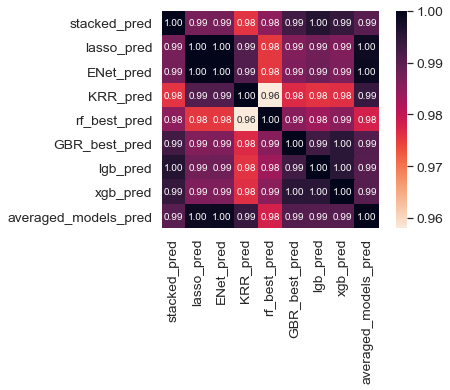

In [649]:
sns.set(font_scale=1.25)
hm = sns.heatmap(all.corr(), cmap='rocket_r', cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=all.columns, xticklabels=all.columns)
plt.show()

## MODELS SUMMARY

In [538]:
models = {'lasso' : lasso,
          'ENet': ENet,
          'KRR': KRR,
          'rf_best' : rf_best, 
          'GBR_best' : GBR_best,
          'XGBR_best' : XGBR_best,
          'LGBM_best': LGBM_best,
          'averaged_models': averaged_models,
          'Stacking_best' : Stacking_best,
         }

def MAE(model, X_Final, y):
    model.fit(X_Final,y)
    y_predict = model.predict(X_Final)
    return mean_absolute_error(y, y_predict)

def Score(model, X_Final, y):
    model.fit(X_Final,y)
    score = model.score(X_Final,y)
    return score

results = dict()
for name, model in models.items():

    mae = MAE(model, X_Final, y)
    score = Score (model, X_Final, y)
    rmse_mean = np.mean(rmsle_cv2(model, X_Final, y))
    rmse_std = np.std(rmsle_cv2(model, X_Final, y))

    values = {'mee': mae, 'Score': score, 'rmse_mean': rmse_mean, 'rmse_std': rmse_std}
    results[name] = values

results_table = pd.DataFrame(results.values(), index=results.keys())
results_table.columns = columns = ['MAE','Score','RMSLE Mean', 'RMSLE Std']
results_table.sort_values(by='RMSLE Mean')


[21:42:35] WARNING: ..\src\learner.cc:541: 
Parameters: { rstate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:42:38] WARNING: ..\src\learner.cc:541: 
Parameters: { rstate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:42:41] WARNING: ..\src\learner.cc:541: 
Parameters: { rstate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:42:44] WARNING: ..

,MAE,Score,RMSLE Mean,RMSLE Std
averaged_models,0.049,0.966,0.097,0.008
Stacking_best,0.047,0.970,0.101,0.008
ENet,0.066,0.936,0.101,0.007
lasso,0.066,0.935,0.101,0.007
GBR_best,0.019,0.995,0.101,0.008
XGBR_best,0.019,0.995,0.101,0.005
KRR,0.052,0.961,0.102,0.008
LGBM_best,0.054,0.957,0.106,0.006
rf_best,0.049,0.968,0.123,0.005


## Voting Weights

In [628]:
z = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]

MinValue=1

for i in z:
    for j in z:
        if i+j <1:
            if MinValue>rmsle(y,stacked_train_pred*i +
               xgb_train_pred*j + KRR_train_pred*(1-i-j)):
                MinValue=rmsle(y,stacked_train_pred*i +
               xgb_train_pred*j + KRR_train_pred*(1-i-j))
                k1=i
                k2=j
                
k3=1-k1-k2

print(MinValue)

print(k1,k2,k3)
'''RMSE on the entire data when voting'''

print('RMSLE:')
print(rmsle(y,stacked_train_pred*0.1 +
               xgb_train_pred*0.8 + KRR_train_pred*0.1 ))

0.031113688505838434
0.1 0.8 0.09999999999999998
RMSLE:
0.031113688505838434


In [629]:
ensemble = stacked_pred*0.1 + xgb_pred*0.8 +KRR_pred*0.1
ensemble

array([121695.6602458 , 165021.63207637, 187346.87361639, ...,
       166257.37878737, 112420.46189412, 212411.81057795])

## Submission

In [630]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)

In [661]:
SalePrice = pd.DataFrame({'SalePrice':y})
finalsee = pd.concat([X, SalePrices], axis=1)
finalsee

,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,5.831,19.212,1.541,0.000,2.440,1.820,14.188,14.188,8.059,1.194,...,0,0,1,0,0,0,0,1,0,12.248
1,6.221,19.712,1.541,0.000,2.260,2.440,14.145,14.145,0.000,1.541,...,0,0,1,0,0,0,0,1,0,12.109
2,5.915,20.347,0.000,0.000,2.440,1.820,14.184,14.186,7.647,1.194,...,0,0,1,0,0,0,0,1,0,12.317
3,5.685,19.692,0.000,0.000,2.440,1.820,14.048,14.136,0.000,1.541,...,0,0,1,1,0,0,0,0,0,11.849
4,6.315,21.325,0.000,0.000,2.603,1.820,14.183,14.183,9.392,1.194,...,0,0,1,0,0,0,0,1,0,12.429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,5.744,18.961,1.541,0.000,2.260,1.820,14.181,14.183,0.000,1.541,...,0,0,1,0,0,0,0,1,0,12.073
1424,6.338,20.995,1.541,0.000,2.260,2.056,14.148,14.164,7.004,1.541,...,0,0,1,0,0,0,0,1,0,12.255
1425,5.860,19.476,1.541,0.000,2.440,2.603,14.089,14.192,0.000,0.000,...,0,0,1,0,0,0,0,1,0,12.493
1426,5.915,19.760,1.541,0.000,2.056,2.056,14.104,14.177,0.000,1.541,...,0,0,1,0,0,0,0,1,0,11.864


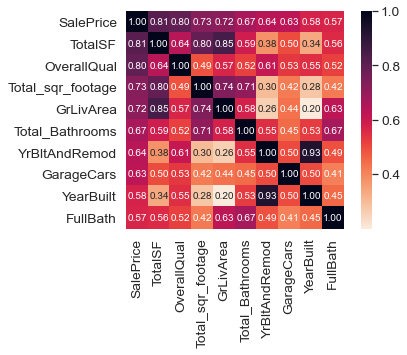

In [663]:
#correlation matrix
corrmat = finalsee.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(finalsee[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cmap='rocket_r', cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()